	Ep: 0 Test reward: 0.0 1.0
	Ep: 1000 Test reward: 0.0 0.5
	Ep: 2000 Test reward: 0.09 0.25
	Ep: 3000 Test reward: 0.19 0.12
	Ep: 4000 Test reward: 0.66 0.06
	Ep: 5000 Test reward: 0.52 0.03
	Ep: 6000 Test reward: 0.0 0.01
	Ep: 7000 Test reward: 0.79 0.01
	Ep: 8000 Test reward: 0.67 0.0
	Ep: 9000 Test reward: 0.73 0.0
	Ep: 10000 Test reward: 0.74 0.0
	Ep: 11000 Test reward: 0.68 0.0
	Ep: 12000 Test reward: 0.34 0.0
	Ep: 13000 Test reward: 0.46 0.0
	Ep: 14000 Test reward: 0.54 0.0
	Ep: 15000 Test reward: 0.56 0.0
	Ep: 16000 Test reward: 0.69 0.0
	Ep: 17000 Test reward: 0.71 0.0
	Ep: 18000 Test reward: 0.72 0.0
	Ep: 19000 Test reward: 0.73 0.0
	Ep: 20000 Test reward: 0.71 0.0
	Ep: 21000 Test reward: 0.76 0.0
	Ep: 22000 Test reward: 0.73 0.0
	Ep: 23000 Test reward: 0.73 0.0
	Ep: 24000 Test reward: 0.71 0.0
	Ep: 25000 Test reward: 0.58 0.0
	Ep: 26000 Test reward: 0.82 0.0
	Ep: 27000 Test reward: 0.84 0.0
	Ep: 28000 Test reward: 0.71 0.0
	Ep: 29000 Test reward: 0.74 0.0
	Ep: 30000 Test rewa

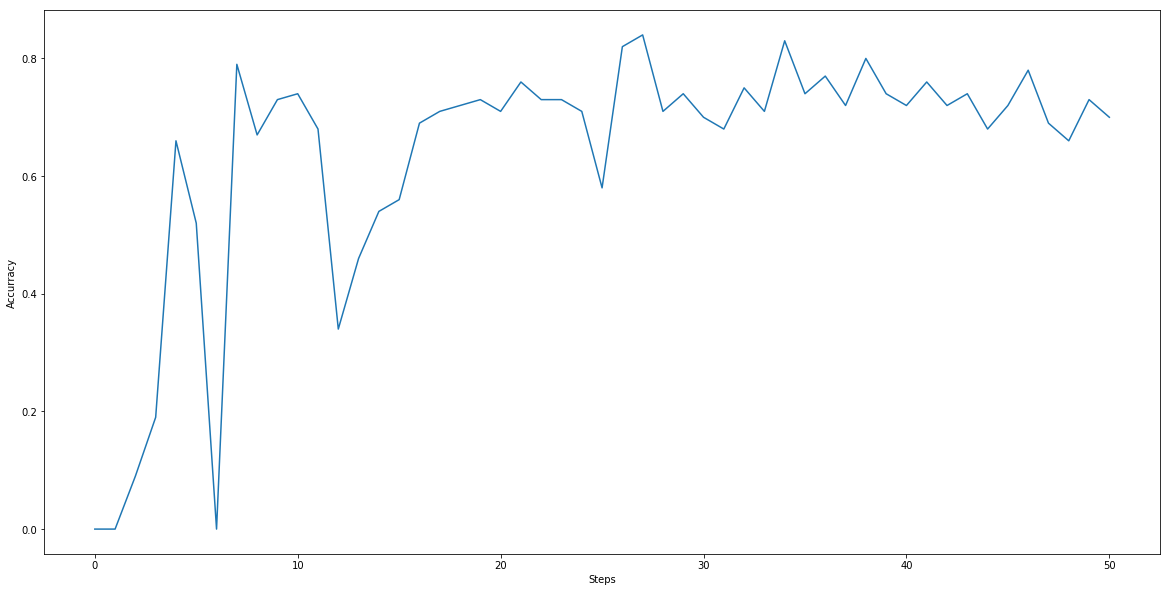

In [32]:
#imports
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import namedtuple
import random

%matplotlib inline
#tune hyperparamaters
GAMMA = 0.95

# NB: the decay rate allow to regulate the Exploration - Exploitation trade-off
#     start with a EPSILON of 1 and decay until reach 0
epsilon = 1.0
EPS_DECAY_RATE = 0.9993

LEARNING_RATE = 0.8

# .. and constants
TEST_EPISODES = 100
MAX_GAMES = 50001
#load environment
env = gym.make("FrozenLake-v0")
obs = env.reset()

obs_length = env.observation_space.n
n_actions = env.action_space.n

reward_count = 0
games_count = 0

# Create and initialize the table with 0.0
table = collections.defaultdict(float)
 #rewards table   
test_rewards_list = []

def select_eps_greedy_action(table, obs, n_actions):
    '''
    Select the action using a ε-greedy policy (add a randomness ε for the choice of the action)
    '''
    value, action = best_action_value(table, obs)

    if random.random() < epsilon:
        return random.randint(0,n_actions-1)
    else:
        return action

def select_greedy_action(table, obs, n_actions):
    '''
    Select the action using a greedy policy (take the best action according to the policy)
    '''
    value, action = best_action_value(table, obs)
    return action

#takes best action -the maximal value
def best_action_value(table, state):
    '''
    Exploring the table, take the best action that maximize Q(s,a)
    '''
    best_action = 0
    max_value = 0
    for action in range(n_actions):
        if table[(state, action)] > max_value:
            best_action = action
            max_value = table[(state, action)]

    return max_value, best_action
#Q(s,a)=Q(s,a) + lr*(reward + gamma*maxQ(s`,a`)-Q(s,a)) ----> Q-learning off policy
def Q_learning(table, obs0, obs1, reward, action):
    '''
    Q-learning. Update Q(obs0,action) according to Q(obs1,*) and the reward just obtained
    '''
    
    # Take the best value reachable from the state obs1
    best_value, info = best_action_value(table, obs1)

    # Calculate Q-target value 
    Q_target = reward + GAMMA * best_value

    # Calculate the Q-error between the target and the previous value
    Q_error = Q_target - table[(obs0, action)]

    # Update Q(obs0,action)
    table[(obs0, action)] += LEARNING_RATE * Q_error
def test_game(env, table, n_actions):
    '''
    Test the new table playing TEST_EPISODES games for 1000 iterations
    '''
    reward_games = []
    for _ in range(TEST_EPISODES):
        obs = env.reset()
        rewards = 0
        while True:
            # Act greedly 
            next_obs, reward, done, info = env.step(select_greedy_action(table, obs, n_actions))
            obs = next_obs
            rewards += reward

            if done:
                reward_games.append(rewards)
                break

    return np.mean(reward_games)



#main function
if __name__=='__main__':
    
    while games_count < MAX_GAMES:

    # Select the action following an ε-greedy policy
        action = select_eps_greedy_action(table, obs, n_actions)
        next_obs, reward, done, _ = env.step(action)

    # Update the Q-table
        
        Q_learning(table, obs, next_obs, reward, action)

        reward_count += reward
        obs = next_obs

        if done:
            epsilon *= EPS_DECAY_RATE

        # Test the new table every 1k games
            if games_count % 1000 == 0:
                test_reward = test_game(env, table, n_actions)
                print('\tEp:', games_count, 'Test reward:', test_reward, np.round(epsilon,2))

                test_rewards_list.append(test_reward)

            obs = env.reset()
            reward_count = 0
            games_count += 1    

# Plot the accuracy over the number of steps
    plt.figure(figsize=(20,10))
    plt.xlabel('Steps')
    plt.ylabel('Accurracy')
    plt.plot(test_rewards_list)
    plt.show()


	Ep: 0 Test reward: 0.0 1.0
	Ep: 1000 Test reward: 0.07 0.5
	Ep: 2000 Test reward: 0.07 0.25
	Ep: 3000 Test reward: 0.02 0.12
	Ep: 4000 Test reward: 0.03 0.06
	Ep: 5000 Test reward: 0.03 0.03
	Ep: 6000 Test reward: 0.1 0.01
	Ep: 7000 Test reward: 0.06 0.01
	Ep: 8000 Test reward: 0.08 0.0
	Ep: 9000 Test reward: 0.06 0.0
	Ep: 10000 Test reward: 0.03 0.0
	Ep: 11000 Test reward: 0.06 0.0
	Ep: 12000 Test reward: 0.04 0.0
	Ep: 13000 Test reward: 0.09 0.0
	Ep: 14000 Test reward: 0.03 0.0
	Ep: 15000 Test reward: 0.05 0.0
	Ep: 16000 Test reward: 0.06 0.0
	Ep: 17000 Test reward: 0.03 0.0
	Ep: 18000 Test reward: 0.02 0.0
	Ep: 19000 Test reward: 0.05 0.0
	Ep: 20000 Test reward: 0.02 0.0
	Ep: 21000 Test reward: 0.08 0.0
	Ep: 22000 Test reward: 0.02 0.0
	Ep: 23000 Test reward: 0.08 0.0
	Ep: 24000 Test reward: 0.05 0.0
	Ep: 25000 Test reward: 0.04 0.0
	Ep: 26000 Test reward: 0.05 0.0
	Ep: 27000 Test reward: 0.05 0.0
	Ep: 28000 Test reward: 0.02 0.0
	Ep: 29000 Test reward: 0.04 0.0
	Ep: 30000 Test rew

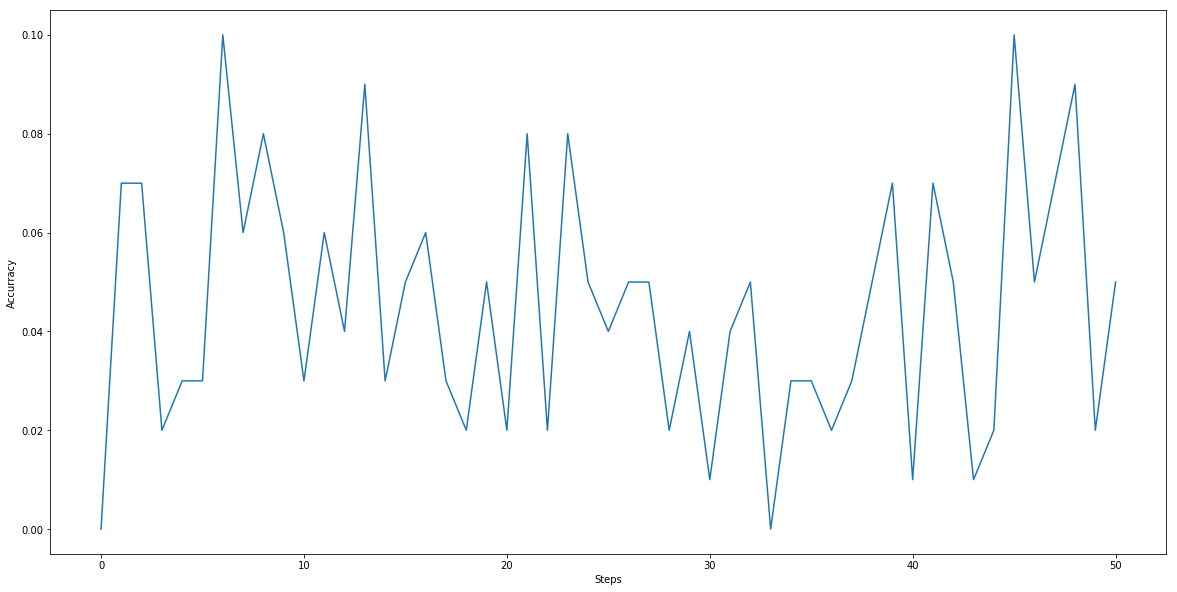

In [33]:

#imports
import gym
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import namedtuple
import random

%matplotlib inline
#tune hyperparamaters
GAMMA = 0.95

# NB: the decay rate allow to regulate the Exploration - Exploitation trade-off
#     start with a EPSILON of 1 and decay until reach 0
epsilon = 1.0
EPS_DECAY_RATE = 0.9993

LEARNING_RATE = 0.8

# .. and constants
TEST_EPISODES = 100
MAX_GAMES = 50001
#load environment
env = gym.make("FrozenLake-v0")
obs = env.reset()

obs_length = env.observation_space.n
n_actions = env.action_space.n

reward_count = 0
games_count = 0

# Create and initialize the table with 0.0
table = collections.defaultdict(float)
 #rewards table   
test_rewards_list = []

def select_eps_greedy_action(table, obs, n_actions):
    '''
    Select the action using a ε-greedy policy (add a randomness ε for the choice of the action)
    '''
    value, action = best_action_value(table, obs)

    if random.random() < epsilon:
        return random.randint(0,n_actions-1)
    else:
        return action

def select_greedy_action(table, obs, n_actions):
    '''
    Select the action using a greedy policy (take the best action according to the policy)
    '''
    value, action = best_action_value(table, obs)
    return action

#takes best action -the maximal value
def best_action_value(table, state):
    '''
    Exploring the table, take the best action that maximize Q(s,a)
    '''
    best_action = 0
    max_value = 0
    for action in range(n_actions):
        if table[(state, action)] > max_value:
            best_action = action
            max_value = table[(state, action)]

    return max_value, best_action
#Q(s,a)=Q(s,a) + lr*(reward + gamma*maxQ(s`,a`)-Q(s,a)) ----> Q-learning off policy


#Sarsa
# on policy
#Q(s,a)=Q(s,a) + lr*(reward + gamma*Q(s+1,a+1)-Q(s,a)) 
def SARSA(table,state0,state1,reward,action):
    target=reward + GAMMA*table[(state1,action)]
    predict=table[(state0,action)]
    table[(state0,action)]+= LEARNING_RATE*(target- predict)


def Q_learning(table, obs0, obs1, reward, action):
    '''
    Q-learning. Update Q(obs0,action) according to Q(obs1,*) and the reward just obtained
    '''
    
    # Take the best value reachable from the state obs1
    best_value, info = best_action_value(table, obs1)

    # Calculate Q-target value 
    Q_target = reward + GAMMA * best_value

    # Calculate the Q-error between the target and the previous value
    Q_error = Q_target - table[(obs0, action)]

    # Update Q(obs0,action)
    table[(obs0, action)] += LEARNING_RATE * Q_error
def test_game(env, table, n_actions):
    '''
    Test the new table playing TEST_EPISODES games for 1000 iterations
    '''
    reward_games = []
    for _ in range(TEST_EPISODES):
        obs = env.reset()
        rewards = 0
        while True:
            # Act greedly 
            next_obs, reward, done, info = env.step(select_greedy_action(table, obs, n_actions))
            obs = next_obs
            rewards += reward

            if done:
                reward_games.append(rewards)
                break

    return np.mean(reward_games)



if __name__=='__main__':
    
    while games_count < MAX_GAMES:

    # Select the action following a SARSA policy
        action = select_eps_greedy_action(table, obs, n_actions)
        next_obs, reward, done, _ = env.step(action)

    # Update the Q-table
        
        SARSA(table, obs, next_obs, reward, action)

        reward_count += reward
        obs = next_obs

        if done:
            epsilon *= EPS_DECAY_RATE

        # Test the new table every 1k games
            if games_count % 1000 == 0:
                test_reward = test_game(env, table, n_actions)
                print('\tEp:', games_count, 'Test reward:', test_reward, np.round(epsilon,2))

                test_rewards_list.append(test_reward)

            obs = env.reset()
            reward_count = 0
            games_count += 1    

# Plot the accuracy over the number of steps
    plt.figure(figsize=(20,10))
    plt.xlabel('Steps')
    plt.ylabel('Accurracy')
    plt.plot(test_rewards_list)
    plt.show()

    